In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<b><u>Some things to consider:</u></b>

- There are 2 types of embeddings, in which the second one produces much longer chain lengths but lower variance:
    - heuristical minor-embeddings (NP-hard problem). I run the embedding algorithm with seeds set from 1 to 100 and choose the best among them.
        - The criteria to choose a best embedding is to choose according to 3 criteria (most important first): longest chain length, variance of chain lengths, and number of qubits used.
    - polynomial time embeddings to find a clique embedding
- These are experiments for small SAT instances (from 10 variables up to 20 variables)
    - The sat instances are generated using <a href="https://massimolauria.net/cnfgen/benchmarks.html#orgef1b8c5" target="_blank">this library</a>.

<b><u>About other files:</u></b>

- <b>clique_chain_strengths.ipynb</b>: Various tests with the quantum annealer to determine how many ground states are returned for different values of <i>chain_strength</i> with <b>clique embeddings</b>. You can find various graphs to see how this variates for chain_strengths that go from 1 to max(bqm.quadratic_coeffs) in a stepsize of 0.25.
- <b>chain_strengths</b> is the same as <i>clique_chain_strengths.ipynb</i> but for heuristical minor embeddings.
- Some graphs comparing the best embeddings and some attributes of the SAT instances I am testing can be found at <b><i>rnd_best_embeddings.ipynb</i></b> for heuristical embeddings, and in <b><i>clique_embeddings.ipynb</i></b> for clique embeddings.

<b><u>Columns of data:</u></b>
- number of variables
- number of clauses
- <b>ratio_sat</b>: $\frac{number\_satistifiable\_answer}{all\_answers}$


- <b>var_clause_rel</b>: $\frac{num\_variables}{num\_clauses}$


- <b>max_chain_length</b> of an embbeding
- <b>num_qubits</b>: qubits used by the (best) embedding of a given instance.
- <b>variance</b>: variance of the chain lengths of the (best) embedding of a given instance.
- <b>max_coeff</b>: greatest absolute value among the quadratic coefficients of a given sat instance.
- <b>precision</b>: $\frac{ground\_states}{total\_samples}$

# Correlation Matrix of clique embeddings (Pearson)

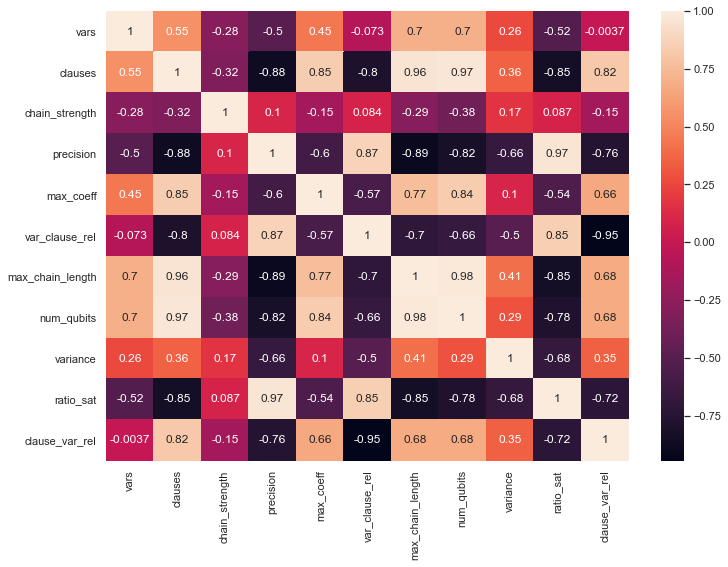

In [3]:
df = pd.read_csv("./clique_final_results.csv")
df = df.drop("Unnamed: 0", axis=1)
df["clause_var_rel"] = df.clauses/df.vars
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(df.corr(), cbar=True, annot=True)

# Correlation matrix of heuristical embeddings (Pearson)

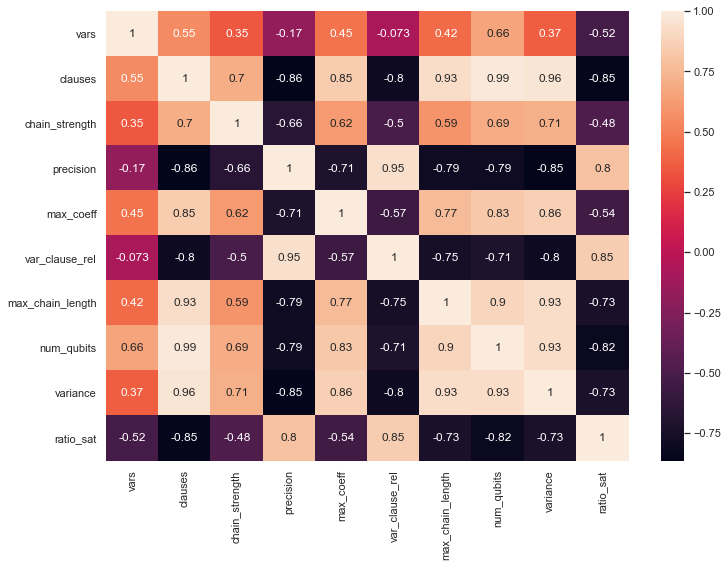

In [7]:
df = pd.read_csv("./final_results.csv")
df = df.drop("Unnamed: 0", axis=1)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(df.corr(), cbar=True, annot=True)

# Difference in precision between both types of Embeddings

In [35]:
def get_combined_dataframes():
    df = pd.DataFrame()
    vars_to_clauses = {
        10: [10, 15, 20, 25],
        15: [15, 20, 25, 30, 35, 40, 45],
        20: [30, 35]
    }
    for (num_vars, nclauses_arr) in vars_to_clauses.items():
        for num_clauses in nclauses_arr:
            df1 = pd.read_csv(f"./rnd_cnf_precision/v{num_vars}_c{num_clauses}.csv")
            #df1 = df1.drop("Unnamed: 0", axis=1)
            df2 = pd.read_csv(f"./rnd_cnf_precision/clique_v{num_vars}_c{num_clauses}.csv")
            #df2 = df2.drop("Unnamed: 0", axis=1)
    
            df1['embedding'] = f"heuristical"
            df1['sat_instance_name'] = f"v{num_vars}_c{num_clauses}"
            df2['embedding'] = f"clique"
            df2['sat_instance_name'] = f"clique_{num_vars}_c{num_clauses}"
            
            df = pd.concat([df, df1, df2], ignore_index=True)
    return df

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

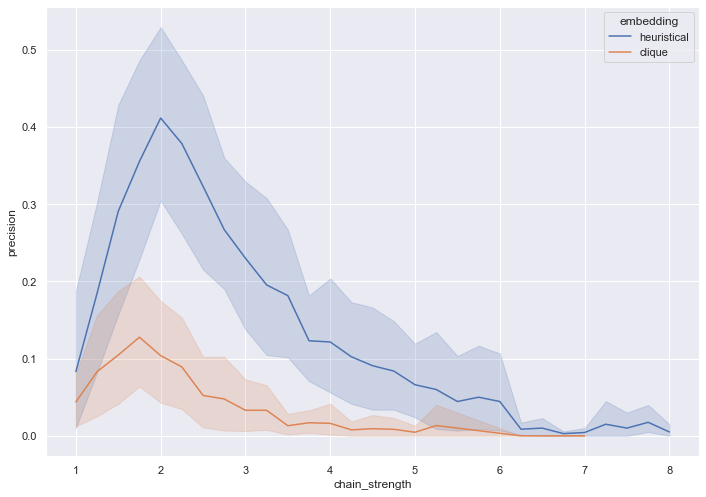

In [38]:
df = get_combined_dataframes()
sns.lineplot(data=df[df.chain_strength<=8], x="chain_strength", y="precision", hue="embedding")